In [180]:
import pyexcel as p
import openpyxl as xl

p.save_book_as(file_name='Dataset/employment/literacy_female.xls',
               dest_file_name='Dataset/employment/literacy_female.xlsx')

p.save_book_as(file_name='Dataset/employment/Employment_services_female.xls',
               dest_file_name='Dataset/employment/Employment_services_female.xlsx')

in_file ="Dataset/employment/literacy_female.xlsx"
oldwb = xl.load_workbook(in_file)
oldws = oldwb.worksheets[0]

in_file1 ="Dataset/employment/Employment_services_female.xlsx"
oldwb1 = xl.load_workbook(in_file1)
oldws1 = oldwb1.worksheets[0]

out_file = "Dataset/employment/literacy_services_female.xlsx"
newwb = xl.load_workbook(out_file)
newws = newwb.active 

i=2
#read from first file
for process_line in range(2,266):
	#3,267
	country_name=oldws.cell(row = process_line, column = 1).value
	for cols in range(3,63):
		#print(oldws.cell(row =2, column = cols).value)
		data_point=oldws.cell(row = process_line, column = cols).value
		if data_point!=None:
			for line in range(2,189):
				if oldws1.cell(row = line, column = 1).value==country_name:
					data_point_2=oldws1.cell(row = line, column = cols).value
					if data_point_2!=None:
					#save data point from both file
						newws.cell(row =i, column = 1).value = country_name
						newws.cell(row =i, column = 2).value = oldws.cell(row = 1, column = cols).value
						newws.cell(row =i, column = 3).value = data_point
						newws.cell(row =i, column = 4).value = data_point_2
						i=i+1
		
newwb.save(str(out_file))

#employment_agriculture is done

In [181]:
#calculating correlation coefficient 

import numpy as np
import pandas as pd

df = pd.read_excel('Dataset/employment/literacy_services_female.xlsx', index_col=0) 

In [182]:
correlated_features = set()
correlation_matrix = df.corr()

In [183]:
print(correlation_matrix)

                        Year  Literacy  Employ_Agriculture
Year                1.000000  0.202493            0.205167
Literacy            0.202493  1.000000            0.674085
Employ_Agriculture  0.205167  0.674085            1.000000


In [184]:
column_1 = df["Literacy"]
column_2 = df["Employ_Agriculture"]
correlation = column_1.corr(column_2)
print(correlation)

0.674084703490613


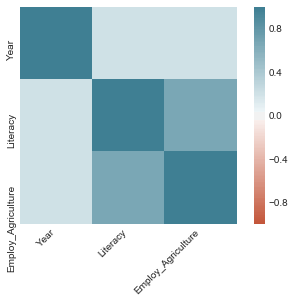

In [185]:
#heatmap of correlation matrix
import seaborn as sns
import matplotlib

ax = sns.heatmap(
    correlation_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
matplotlib.pyplot.savefig("Literacy vs employment")

In [186]:
import pyexcel as p
import openpyxl as xl

p.save_book_as(file_name='Dataset/employment/GenderEmploymentIndex.xlsx',
               dest_file_name='Dataset/employment/GenderEmploymentIndex.xlsx')


in_file ="Dataset/employment/GenderEmploymentIndex.xlsx"
oldwb = xl.load_workbook(in_file)
oldws = oldwb.worksheets[0]



in_file1 ="Dataset/employment/GPI_3_factors.xlsx"
oldwb1 = xl.load_workbook(in_file1)
oldws1 = oldwb1.worksheets[0]

out_file = "Dataset/employment/GPI_Gender_Employment_upper_middle.xlsx"
newwb = xl.load_workbook(out_file)
newws = newwb.active 

i=2
#read from first file
for process_line in range(2,189):
	#3,267
	country_name=oldws.cell(row = process_line, column = 1).value
	income_group=oldws.cell(row = process_line, column = 2).value
	if income_group=="Upper middle income":
		for cols in range(4,34):
			#print(oldws.cell(row =2, column = cols).value)
			year=oldws.cell(row = 1, column = cols).value
			data_point=oldws.cell(row = process_line, column = cols).value
			data_point_2=oldws1.cell(row = process_line, column = cols).value
			newws.cell(row =i, column = 1).value = country_name
			newws.cell(row =i, column = 2).value = income_group
			newws.cell(row =i, column = 3).value = year
			newws.cell(row =i, column = 4).value = data_point_2
			newws.cell(row =i, column = 5).value = data_point
			i=i+1



newwb.save(str(out_file))

In [187]:
#calculating correlation coefficient 

import numpy as np
import pandas as pd

df1 = pd.read_excel('Dataset/employment/GPI_Gender_Employment_upper_middle.xlsx', index_col=0) 

In [188]:
correlated_features = set()
correlation_matrix1 = df1.corr()

In [189]:
print(correlation_matrix1)

                       Year       GPI  Gender_Employment
Year               1.000000  0.033229          -0.031184
GPI                0.033229  1.000000           0.850256
Gender_Employment -0.031184  0.850256           1.000000


In [190]:
column_1 = df1["GPI"]
column_2 = df1["Gender_Employment"]
correlation1 = column_1.corr(column_2)
print(correlation1)

0.8502556432207031


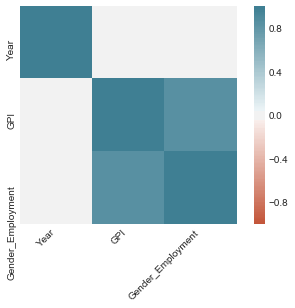

In [191]:
#heatmap of correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(
    correlation_matrix1, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.savefig("GPI vs Gender employment")

In [192]:
df_gpi=pd.read_excel('Dataset/employment/GPI_Gender_Employment_upper_middle.xlsx')

In [193]:

label_array = df1.index.unique()


In [194]:

UniqueNames = df1.index.unique()

#create a data frame dictionary to store your data frames
DataFrameDict = {elem : pd.DataFrame for elem in UniqueNames}

for key in DataFrameDict.keys():
    DataFrameDict[key] = df1[:][df1.index == key]

In [195]:
len(DataFrameDict)

50

Correlation matrix for individual country

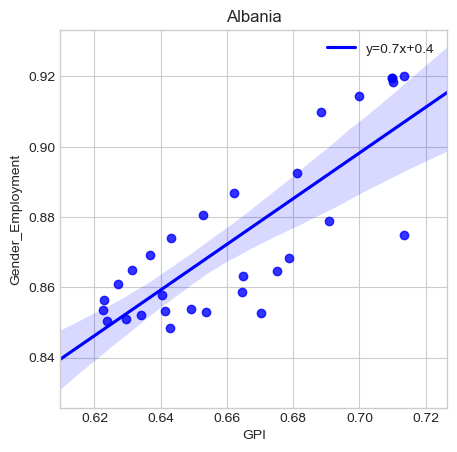

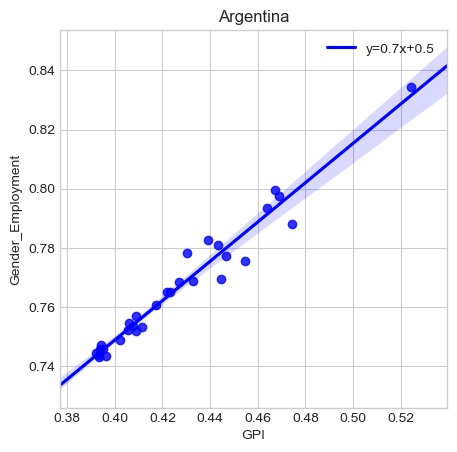

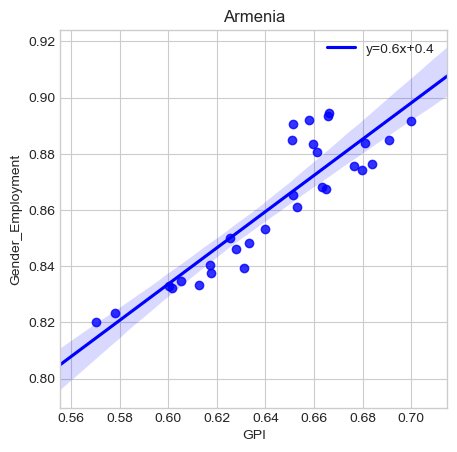

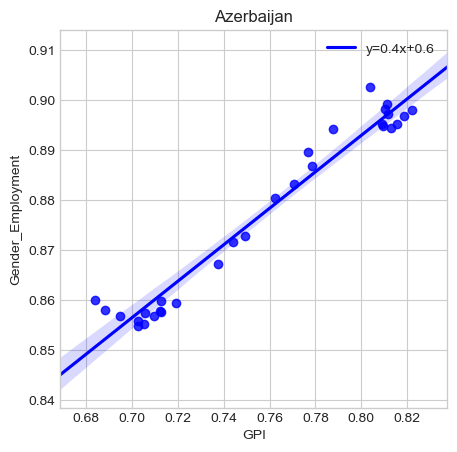

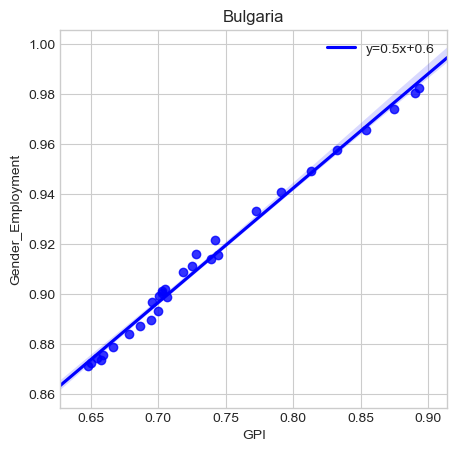

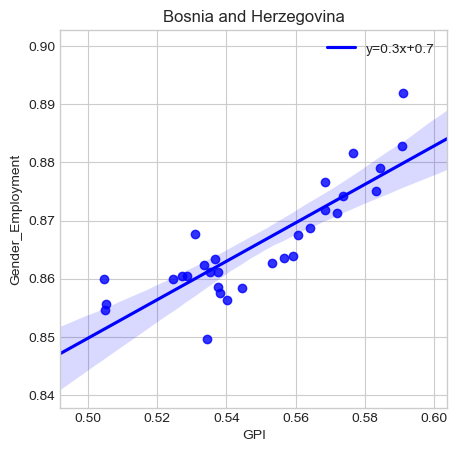

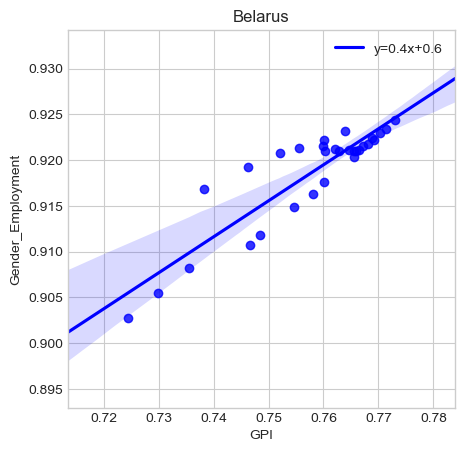

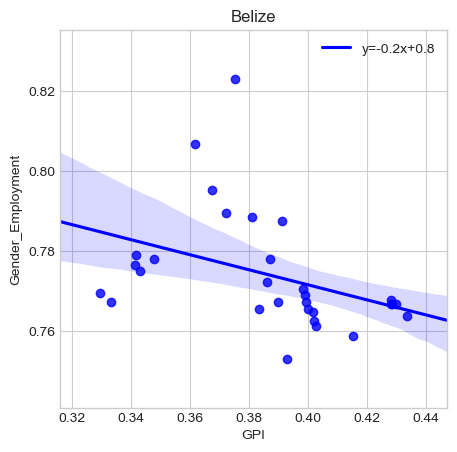

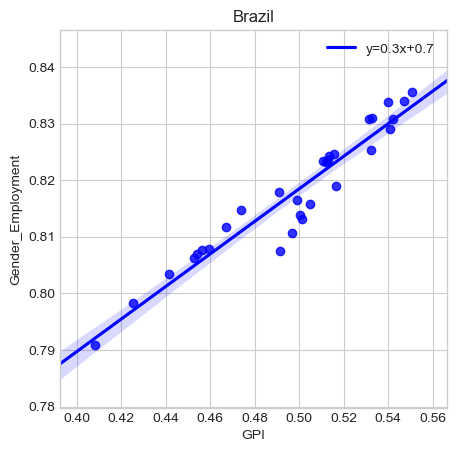

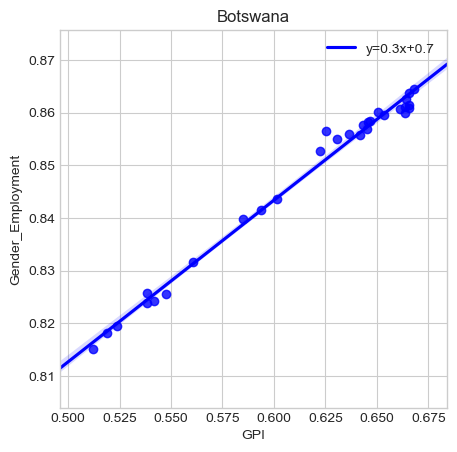

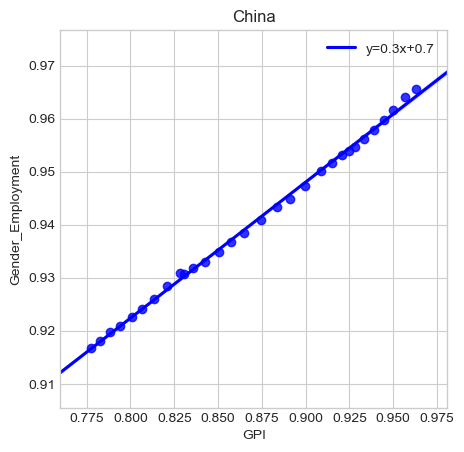

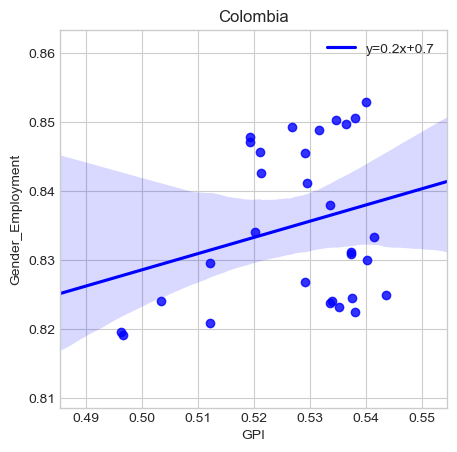

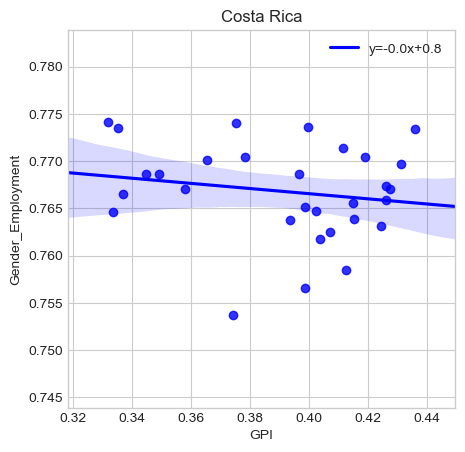

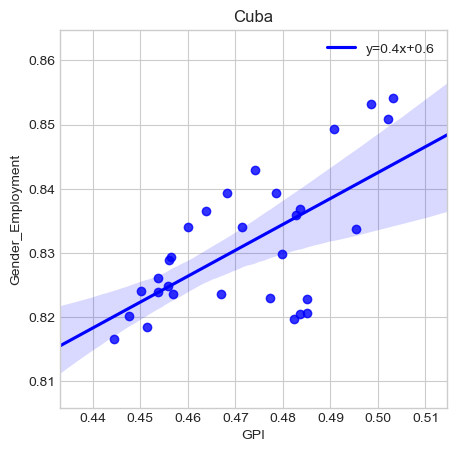

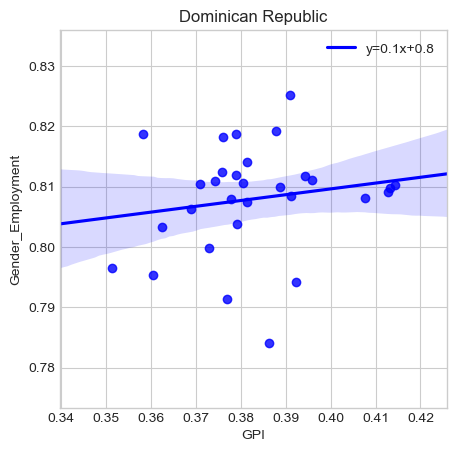

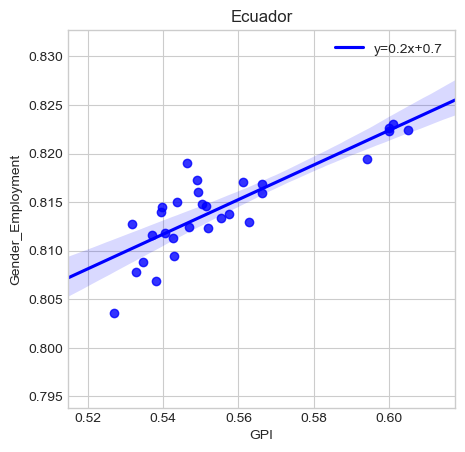

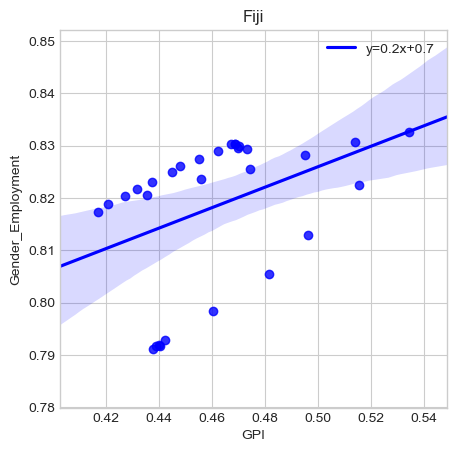

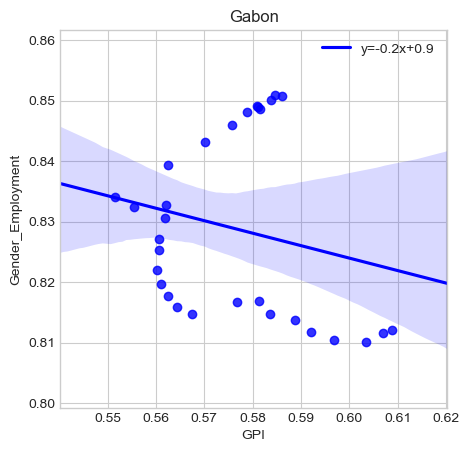

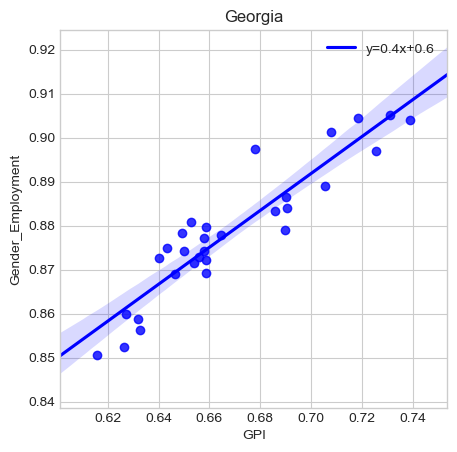

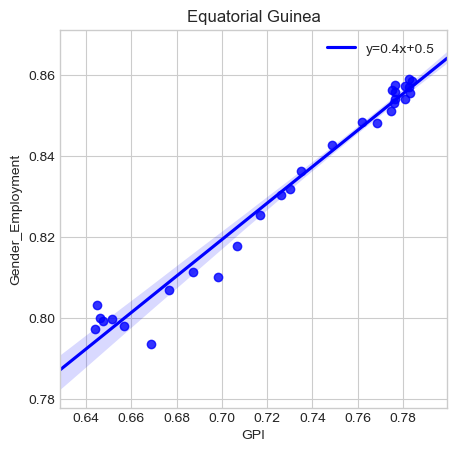

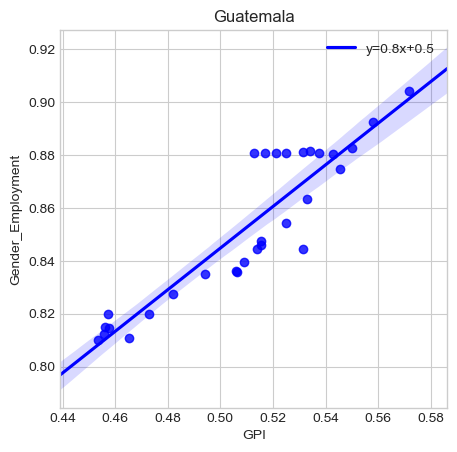

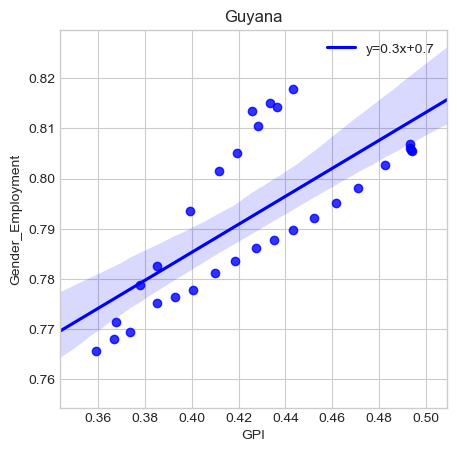

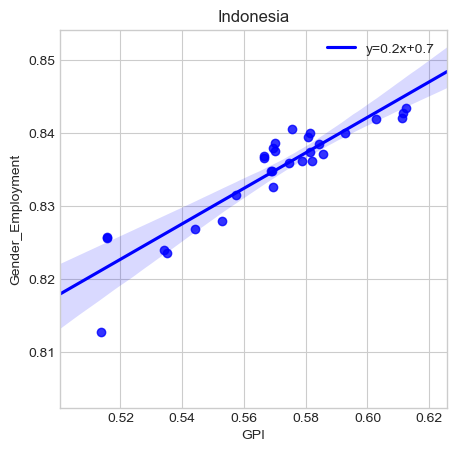

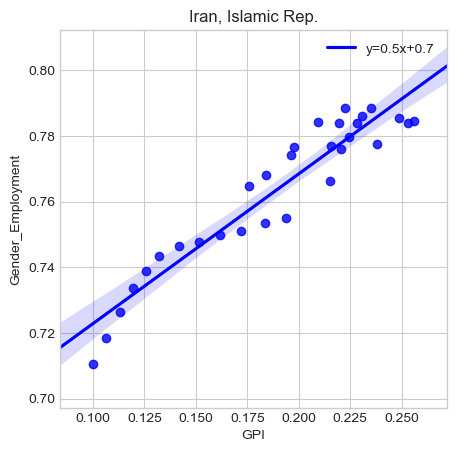

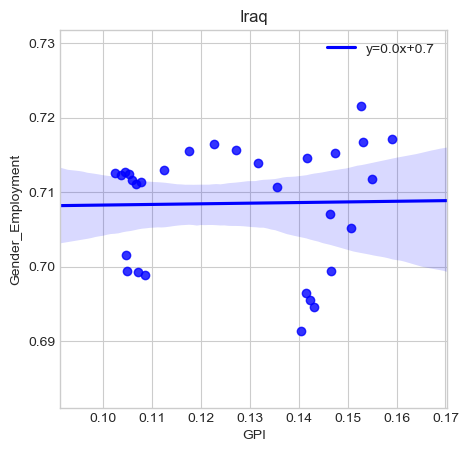

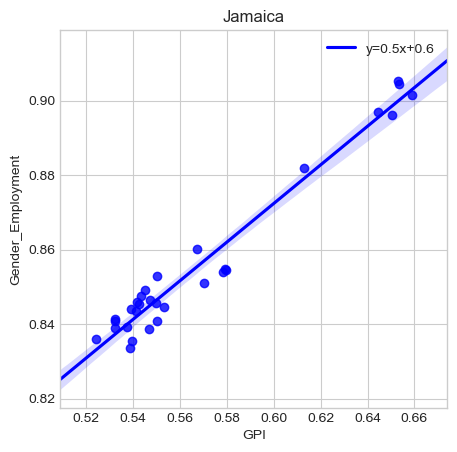

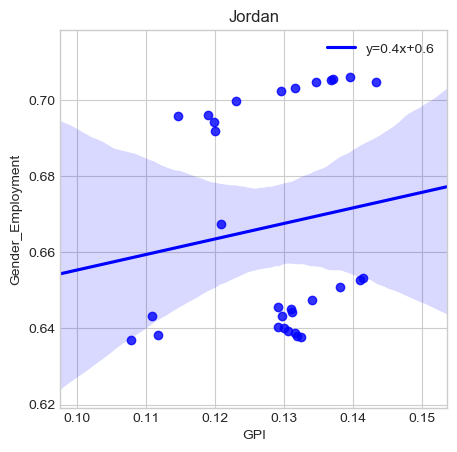

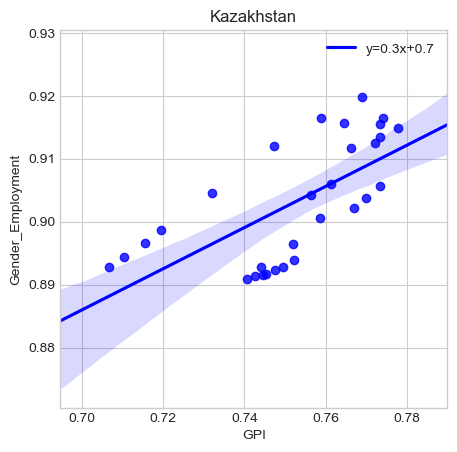

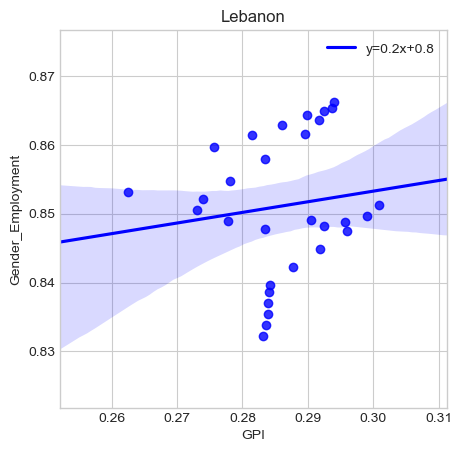

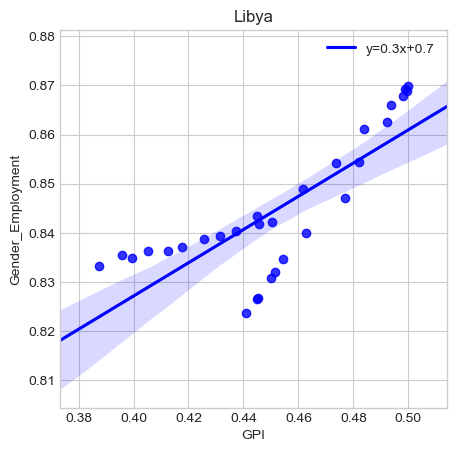

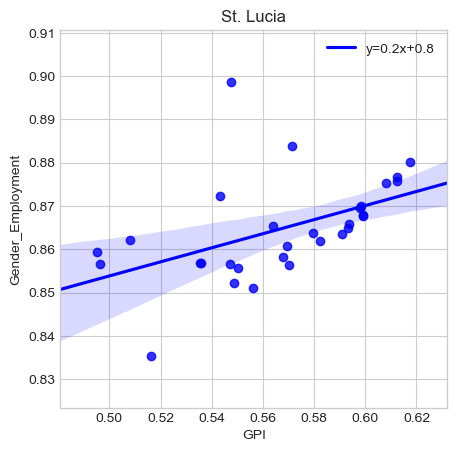

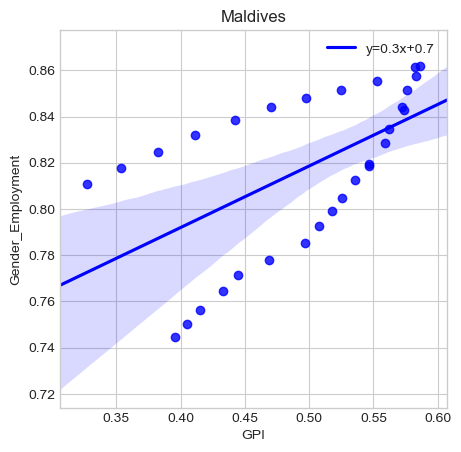

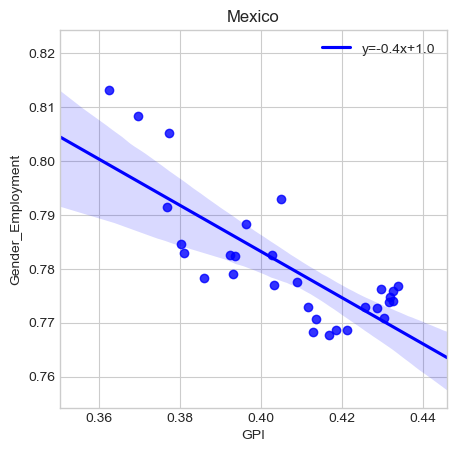

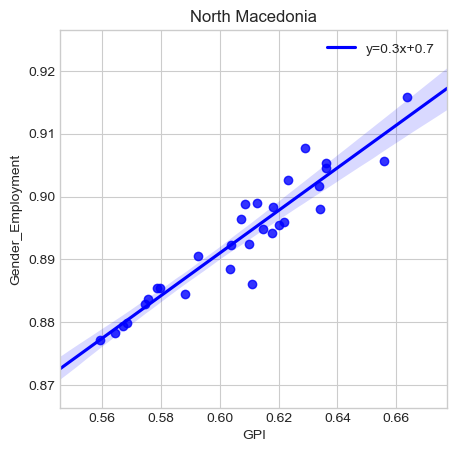

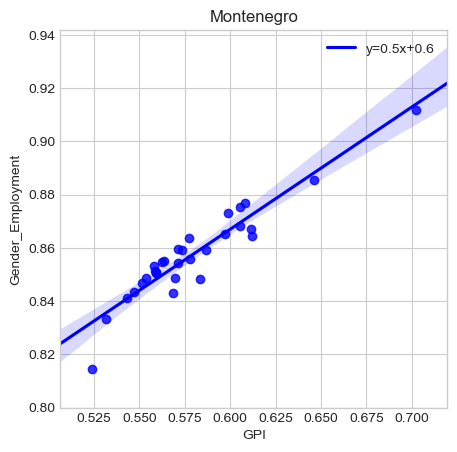

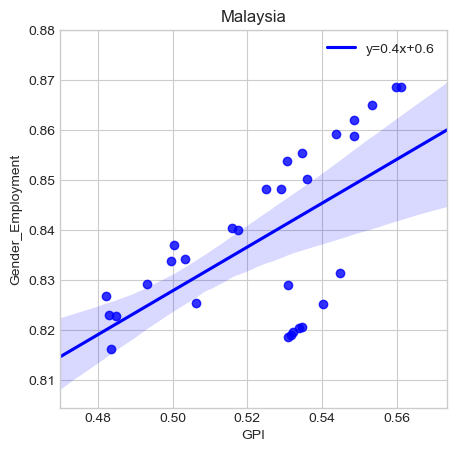

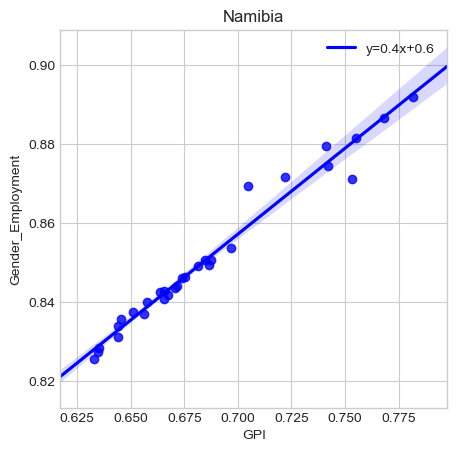

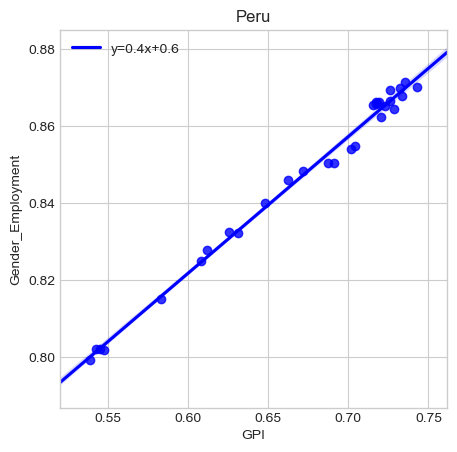

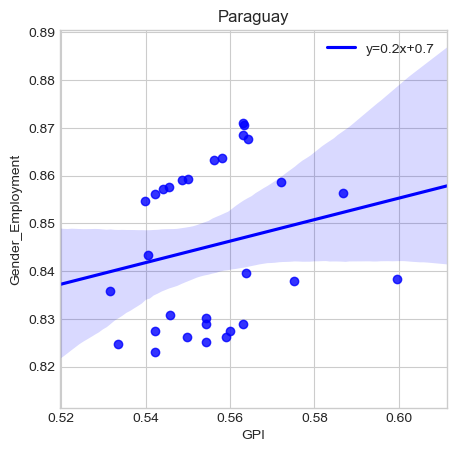

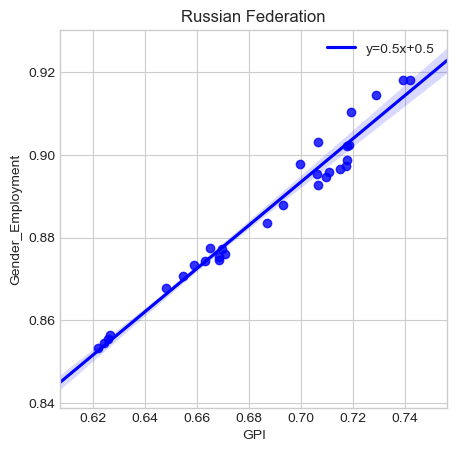

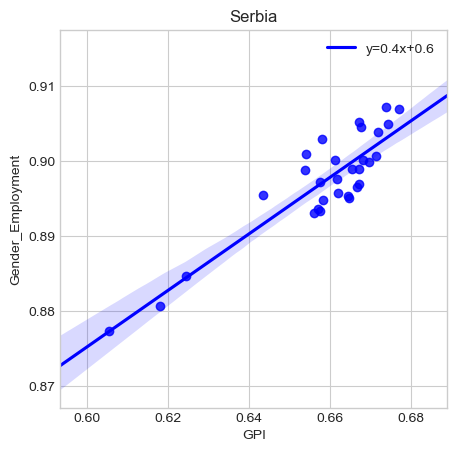

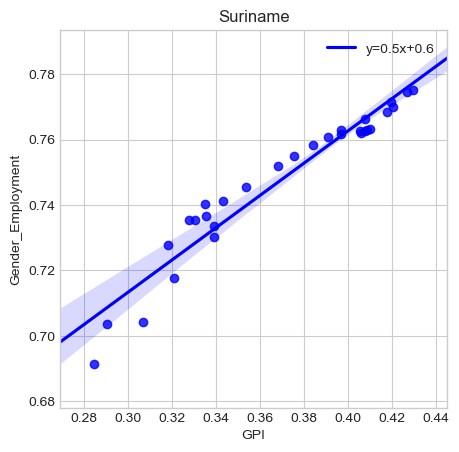

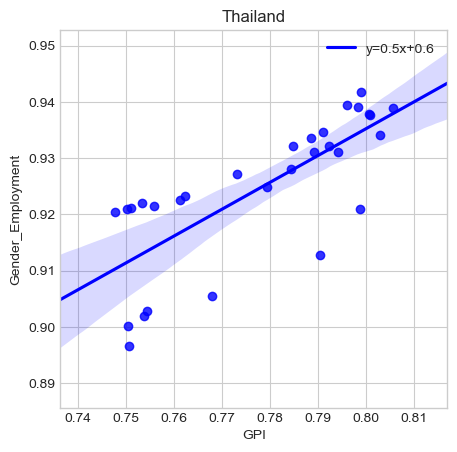

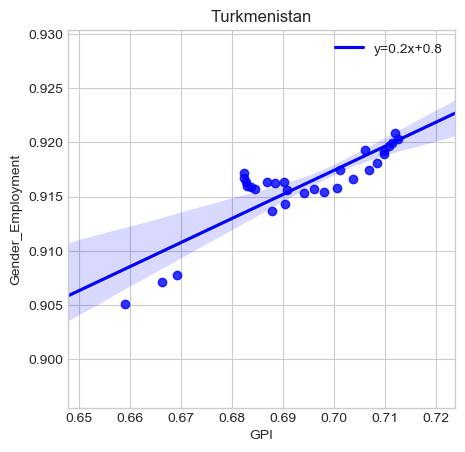

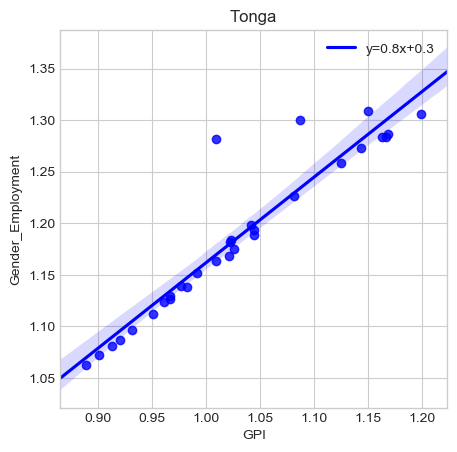

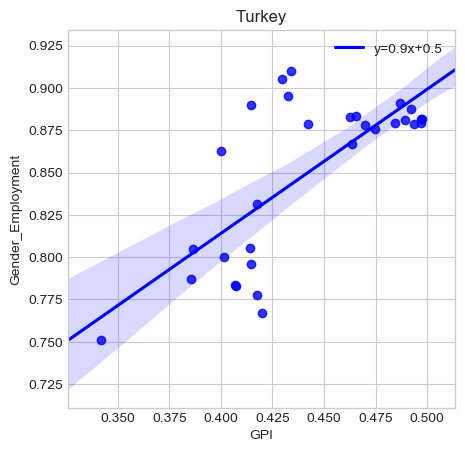

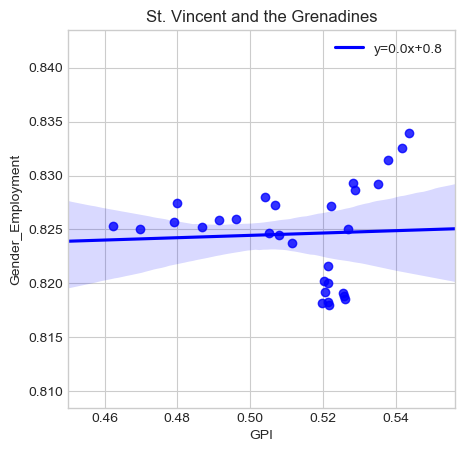

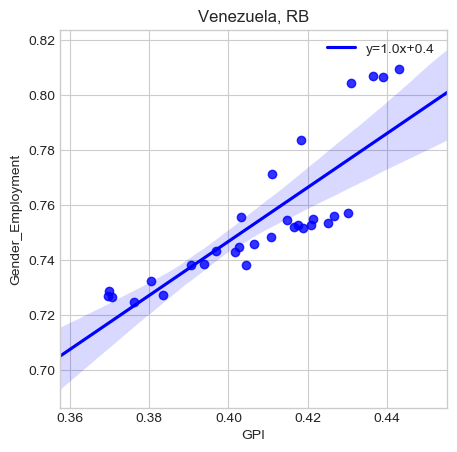

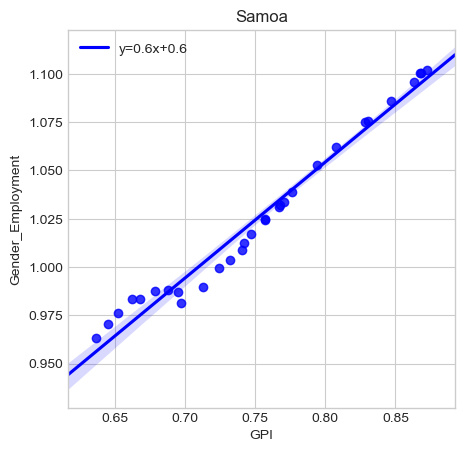

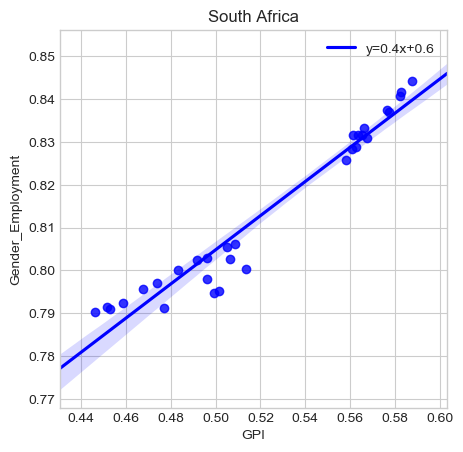

In [196]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

keys_list = list(DataFrameDict)
for i in range(len(keys_list)):
    df1=DataFrameDict[keys_list[i]]
    plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
    slope, intercept, r_value, p_value, std_err = stats.linregress(df1['GPI'],df1['Gender_Employment'])
    ax = sns.regplot(x='GPI', y='Gender_Employment', data=df1,color='b',line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.title(keys_list[i]);
    ax.legend()
    plt.savefig(str(keys_list[i])+"figure.png")
    plt.show()




In [197]:
import pandas as pd
df_economy_types = pd.read_excel("Dataset/employment/economy_types.xlsx")

In [198]:
dict_GPI = {'Country_name' : df_gpi['Country_name'], 'Income_group' : df_gpi['Income_group'], 'Region' : df_economy_types['Region'],'GPI':df_gpi['GPI'],'Gender_Employment':df_gpi['Gender_Employment'] }

df_GenderEmploymentIndex = pd.DataFrame(dict_GPI)

In [199]:
df_contributing_female = pd.read_excel("Dataset/employment/Contributing_family _workers_female.xls")
region_df = pd.merge(df_economy_types, df_contributing_female, on='Country Code').loc[:,:'Country Name']
region_df = region_df.rename({'Country Name':'Country_name'}, axis='columns')


In [200]:
merged_df = pd.merge(df_gpi, region_df, on='Country_name').loc[:,:'Region']

In [201]:
df = merged_df.groupby(['Region','Year'])

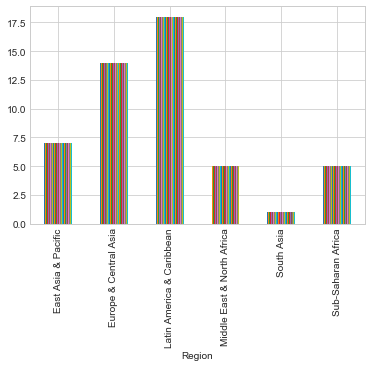

In [276]:
pd.crosstab(merged_df['Region'],merged_df['Year']).plot.bar()
plt.legend('')

In [203]:
#calculate Pearson's coefficient for region based data
pearsoncorr = merged_df.corr(method='pearson')
pearsoncorr

,Year,GPI,Gender_Employment
Year,1.000000,0.033229,-0.031184
GPI,0.033229,1.000000,0.850256
Gender_Employment,-0.031184,0.850256,1.000000


A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables. In our case, the maroon shows very strong correlations. The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
Looking at this we can quickly see that:
The Gender parity index(GPI) is strongly correlated to Gender employment


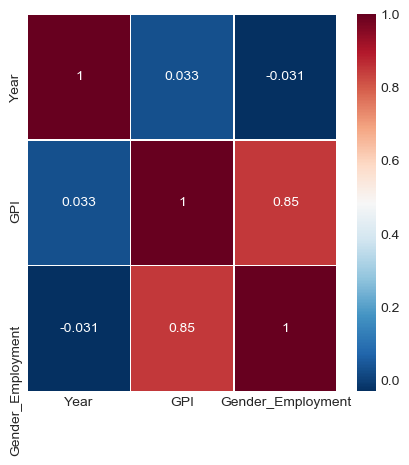

In [204]:
import seaborn as sb
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [205]:
df1 = pd.read_excel('Dataset/employment/literacy_services_female.xlsx') 
df1 = df1.rename({'Country':'Country_name'}, axis='columns')
merged_df1 = pd.merge(df1, region_df, on='Country_name').loc[:,:'Region']

In [256]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, plot_importance

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output


In [269]:
edm = pd.read_excel('Dataset/employment/literacy_services_female.xlsx') 
edm1 = pd.read_excel('Dataset/employment/literacy_services_male.xlsx') 

print(edm.head())
print(edm1.head())



       Country  Year   Literacy  Employ_Agriculture
0  Afghanistan  2011  17.017839           10.359000
1  Afghanistan  2018  29.805210            9.828000
2       Angola  2001  54.194489           53.444000
3       Angola  2014  53.407211           40.915001
4      Albania  2001  98.252274           30.639000
       Country  Year   Literacy  Employ_Agriculture
0  Afghanistan  2011  45.417099           35.654999
1  Afghanistan  2018  55.475449           45.980999
2       Angola  2001  82.919868           54.747002
3       Angola  2014  79.974152           40.296001
4      Albania  2001  99.187607           39.063000


In [270]:
edm.rename(index=str, columns={'Employ_Agriculture':'Employment_agri','Country':'Country_name'},
                               inplace=True)

edm = pd.merge(edm, region_df, on='Country_name').loc[:,:'Region']


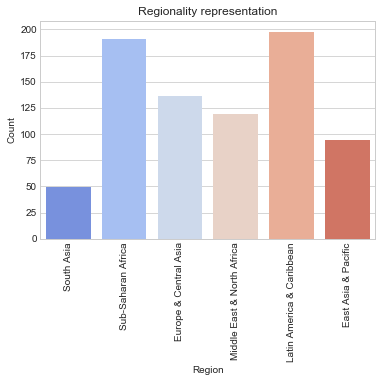

In [271]:
counts = sns.countplot(x='Region', data=edm, palette='coolwarm')
counts.set(xlabel='Region', ylabel='Count', title='Regionality representation')
plt.xticks(rotation=90)
plt.show()

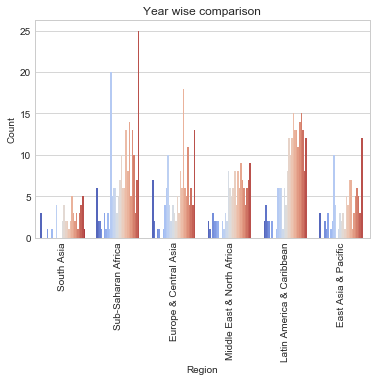

In [272]:
sem = sns.countplot(x='Region', hue='Year', order=['South Asia', 'Sub-Saharan Africa','Europe & Central Asia','Middle East & North Africa','Latin America & Caribbean','East Asia & Pacific'], data=edm, palette='coolwarm')
sem.set(xlabel='Region', ylabel='Count', title='Year wise comparison')
plt.xticks(rotation=90)
plt.legend('')
plt.show()